## Imports

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import itertools
import random
from operator import itemgetter
import matplotlib.pyplot as plt


## 1. Create a Directed graph

In [3]:
import networkx as nx
# Create a Directed Graph
directed_graph = nx.read_edgelist("connections.txt", create_using=nx.DiGraph(directed=True), nodetype=int)

## 2. Show which nodes are bridges.


In [6]:
undirected_graph = nx.read_edgelist("connections.txt", create_using=nx.Graph(), nodetype=int)
print("Bridges in the graph are: ", list(nx.bridges(undirected_graph)))

Bridges in the graph are:  [(0, 11), (0, 12), (0, 15), (0, 18), (0, 37), (0, 43), (0, 74), (0, 114), (0, 209), (0, 210), (0, 215), (0, 287), (0, 292), (0, 335), (107, 911), (107, 918), (107, 1096), (107, 1119), (107, 1145), (107, 1206), (107, 1386), (107, 1466), (107, 1560), (107, 1581), (107, 1834), (348, 358), (348, 447), (348, 550), (414, 585), (414, 602), (414, 607), (414, 608), (414, 613), (414, 624), (414, 638), (414, 668), (414, 674), (1684, 2842), (1684, 3031), (1684, 3071), (1684, 3183), (1684, 3230), (1912, 2079), (1912, 2195), (1912, 2269), (1912, 2457), (1912, 2470), (1912, 2569), (1912, 2596), (3437, 3451), (3437, 3453), (3437, 3570), (3437, 3650), (3437, 3709), (3437, 3729), (3437, 3748), (3437, 3798), (3437, 3820), (3437, 3853), (3437, 3856), (3437, 3935), (3437, 3974), (3980, 3984), (3980, 4008), (3980, 4010), (3980, 4015), (3980, 4022), (3980, 4024), (3980, 4035), (686, 692), (686, 801), (698, 875), (698, 883), (698, 891), (698, 892)]


## 3. Show the density of the graph. Comment about your findings


In [18]:
print('The Density Of the Graph is: ', nx.density(directed_graph))

The Density Of the Graph is:  0.0054099817517196435


## 4. Show which nodes have the highest and lowest number of connections.


In [9]:
degrees = []
for node in directed_graph.nodes:
    degrees.append((node, directed_graph.degree[node]))

degree_values = np.array(degrees)[:, 1]
max_index = np.argmax(degree_values)
min_index = np.argmin(degree_values)

print("Node with the highest degree:", degrees[max_index])
print("Node with the lowest degree:", degrees[min_index])

Node with the highest degree: (107, 1045)
Node with the lowest degree: (11, 1)


Node with the highest number of connections 1045 is 107 and the node with minimum number of connections 1 is 11.

## 5. Show which nodes have the highest incoming and outgoing connections


In [10]:
# Find nodes with highest and lowest incoming degrees
in_degrees = [(node, directed_graph.in_degree[node]) for node in directed_graph.nodes]
in_deg = np.array(in_degrees)[:, 1]
max_in_index = np.argmax(in_deg)
min_in_index = np.argmin(in_deg)

print("Node with the highest incoming degree:", in_degrees[max_in_index])

# Find nodes with highest outgoing degrees
out_degrees = [(node, directed_graph.out_degree[node]) for node in directed_graph.nodes]
out_deg = np.array(out_degrees)[:, 1]
max_out_index = np.argmax(out_deg)
min_out_index = np.argmin(out_deg)

print("Node with the highest outgoing degree:", out_degrees[max_out_index])

Node with the highest incoming degree: (1888, 251)
Node with the highest outgoing degree: (107, 1043)


## 6. Show which nodes have the highest closeness, betweenness, and eigenvector

In [13]:
# Closeness Centrality
closeness_values = nx.closeness_centrality(directed_graph)
top_closeness_nodes = sorted(closeness_values.items(), key=lambda pair: pair[1], reverse=True)[:5]
top_c_indices = [node for node, closeness in top_closeness_nodes]
top_c_closeness_values = [closeness for node, closeness in top_closeness_nodes]
print('Top 5 nodes with the highest closeness centrality: ', top_c_indices)
print('The node with the highest closeness centrality: ', top_closeness_nodes[0])

Top 5 nodes with the highest closeness centrality:  [2642, 2649, 2629, 2643, 2543]
The node with the highest closeness centrality:  (2642, 0.11797503012816456)


Interpretation: Nodes with indices 2642, 2649, 2629, 2643, 2543 have the highest closeness centrality. This implies that these nodes are, on average, the closest to all other nodes in the graph. Specifically, Node 2642 stands out as having the highest closeness centrality, indicating that it has the shortest average distance to other nodes. In a social network context, for example, Node 2642 could represent an individual who is well-connected and has efficient communication paths to others.

In [15]:
# Betweenness Centrality
betweenness_values = nx.betweenness_centrality(directed_graph)
top_betweenness_nodes = sorted(betweenness_values.items(), key=lambda entry: entry[1], reverse=True)[:5]
top_b_indices = [node for node, betweenness in top_betweenness_nodes]
top_b_values = [betweenness for node, betweenness in top_betweenness_nodes]
print('Nodes with the top 5 highest betweenness centrality: ', top_b_indices)
print('Node with the highest betweenness centrality: ', top_betweenness_nodes[0])


Nodes with the top 5 highest betweenness centrality:  [1684, 1912, 1718, 563, 1405]
Node with the highest betweenness centrality:  (1684, 0.03299985344063623)


Interpretation: Nodes with indices 1684, 1912, 1718, 563, 1405 have the highest Betweenness centrality. Node 1684, in particular frequently appears on the shortest paths between other nodes.In a social network, this could represent an individual who acts as a bridge, connecting different groups or facilitating information flow. High betweenness nodes, like Node 1684, play a crucial role in maintaining network connectivity.

In [17]:
# Eigenvector Centrality
eigenvector_values = nx.eigenvector_centrality(directed_graph, max_iter=500)
top_eigenvector_nodes = sorted(eigenvector_values.items(), key=lambda pair: pair[1], reverse=True)[:5]
top_e_indices = [node for node, eigenvector in top_eigenvector_nodes]
top_e_eigenvector_values = [eigenvector for node, eigenvector in top_eigenvector_nodes]
print('Top 5 nodes with the highest eigenvector centrality: ', top_e_indices)
print('The node with the highest eigenvector centrality: ', top_eigenvector_nodes[0])


Top 5 nodes with the highest eigenvector centrality:  [2655, 2654, 2646, 2638, 2631]
The node with the highest eigenvector centrality:  (2655, 0.802704299670652)


Interpretation: Nodes with indices 2655, 2654, 2646, 2638, 2631 have the highest eigenvector centrality. Node 2655 is strongly connected to nodes with high centrality as well. This reflects a form of influence where Node 2655 is not just connected to many nodes but is connected to nodes that, in turn, have significant connections. In a network representing, for instance, online influence, Node 2655 might be a hub of influence connected to other influential nodes.


## 7. Implement a community detection algorithm on the directed graph and show how many communities were created.

In [22]:
import networkx.algorithms.community as nxcom
detected_communities = sorted(nxcom.greedy_modularity_communities(directed_graph), key=len, reverse=True)
print(f"The graph exhibits {len(detected_communities)} communities.")
for index, community in enumerate(detected_communities):
    print(f'Community {index} comprises {len(community)} nodes')

The graph exhibits 11 communities.
Community 0 comprises 1001 nodes
Community 1 comprises 753 nodes
Community 2 comprises 747 nodes
Community 3 comprises 542 nodes
Community 4 comprises 363 nodes
Community 5 comprises 314 nodes
Community 6 comprises 208 nodes
Community 7 comprises 59 nodes
Community 8 comprises 38 nodes
Community 9 comprises 8 nodes
Community 10 comprises 6 nodes


## 8. Show the largest and the smallest community. 

In [24]:
largest_community = detected_communities[0]
smallest_community = detected_communities[-1]
print(f"The largest community includes nodes: {largest_community}\n\nThe smallest community includes nodes: {smallest_community}")

The largest community includes nodes: frozenset({107, 353, 363, 366, 389, 428, 475, 483, 484, 517, 526, 538, 566, 580, 596, 601, 606, 629, 2678, 637, 641, 2693, 649, 651, 656, 2760, 2764, 2822, 2883, 2941, 896, 897, 898, 899, 900, 902, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 959, 960, 961, 962, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 3057, 1010, 1011, 1012, 1013, 1015, 1014, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051

The biggest group has many closely connected members, indicating a strong, cohesive subset. The smallest group, with fewer connections, may represent more isolated or specialized nodes, potentially serving unique roles in the network. 

## 9. Select the largest three communities and draw them. After doing so, remove the top 3 nodes with the highest Degree Centrality, Closeness Centrality, Betweenness Centrality, and Eigenvector. Each should be in a separate plot/draw.


In [26]:
largest_com = directed_graph.subgraph(largest_community)
second_largest_com = directed_graph.subgraph(detected_communities[1])
third_largest_com = directed_graph.subgraph(detected_communities[2])

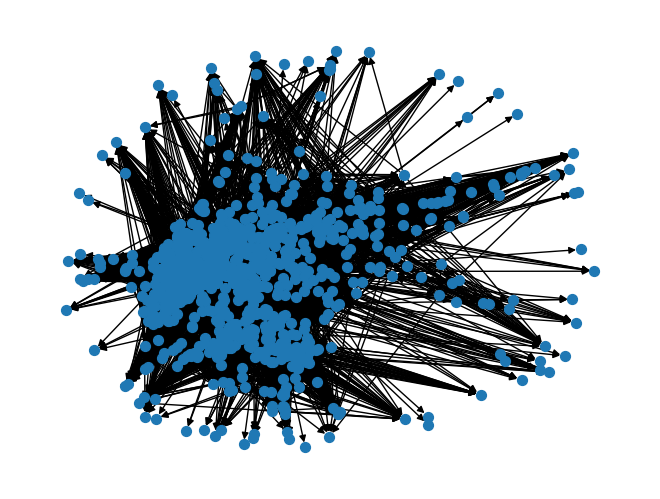

In [29]:
nx.draw(largest_com, node_size=50)

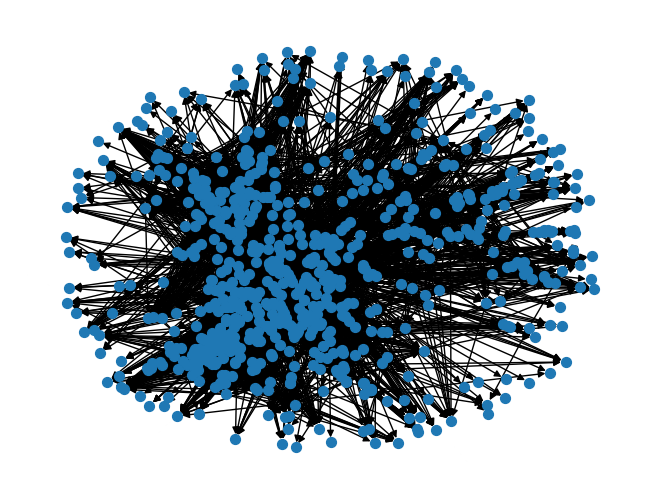

In [30]:
nx.draw(second_largest_com, node_size=50)

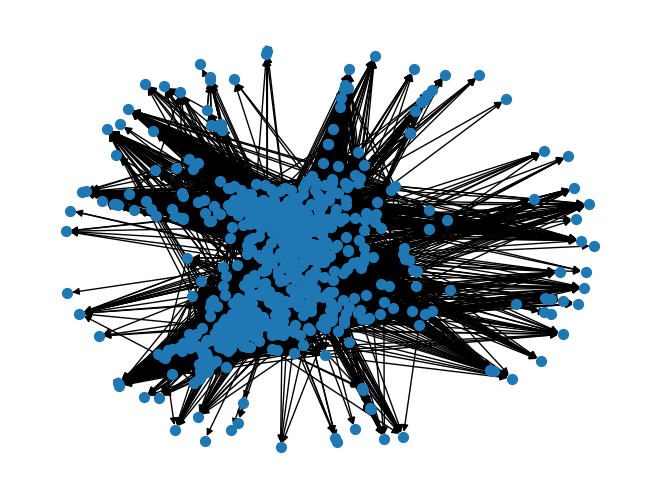

In [31]:
nx.draw(third_largest_com, node_size=50)

DiGraph with 998 nodes and 25577 edges: removed top 3 nodes with the highest Degree Centrality [107, 1888, 1800]


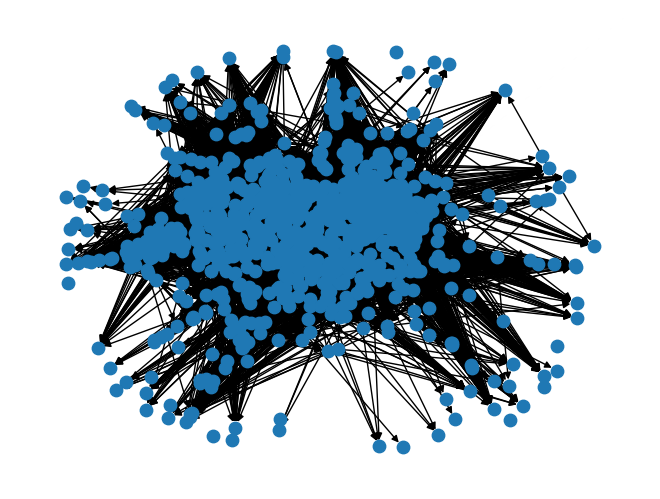

DiGraph with 750 nodes and 6491 edges: removed top 3 nodes with the highest Degree Centrality [3437, 686, 3830]


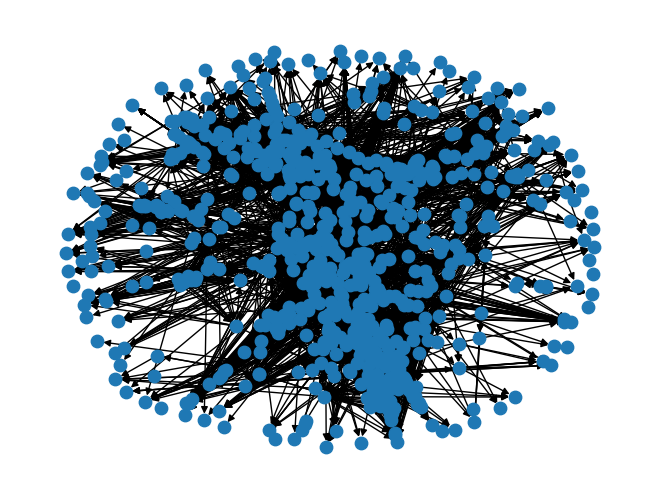

DiGraph with 744 nodes and 13386 edges: removed top 3 nodes with the highest Degree Centrality [1684, 2839, 3363]


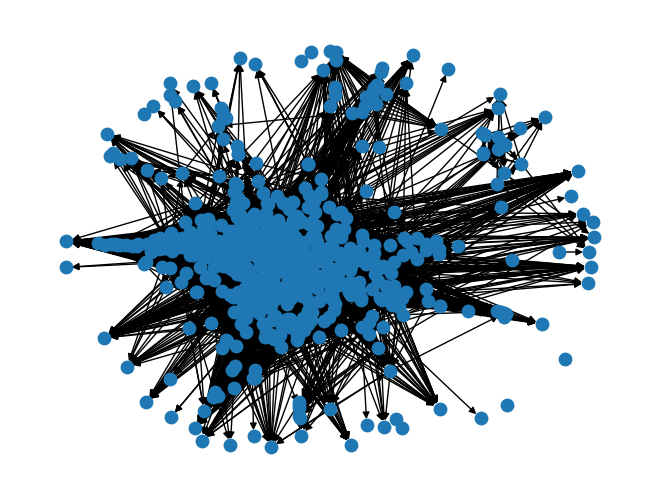

In [33]:
for graph_copy in [largest_com.copy(), second_largest_com.copy(), third_largest_com.copy()]:
    degree_values = nx.degree_centrality(graph_copy).items()
    top_degree = sorted(degree_values, key=lambda pair: pair[1], reverse=True)[:3]
    top_degree_nodes = [node[0] for node in top_degree]
    graph_copy.remove_nodes_from(top_degree_nodes)
    print(f"{graph_copy}: removed top 3 nodes with the highest Degree Centrality {top_degree_nodes}")
    nx.draw(graph_copy, node_size=80)
    plt.show()

DiGraph with 998 nodes and 26723 edges: removed top 3 nodes with the highest Closeness Centrality [1881, 1888, 1885]


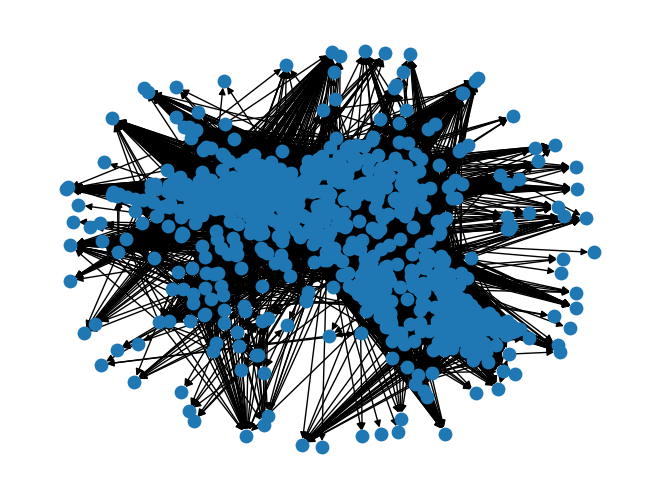

DiGraph with 750 nodes and 7186 edges: removed top 3 nodes with the highest Closeness Centrality [3948, 3918, 3962]


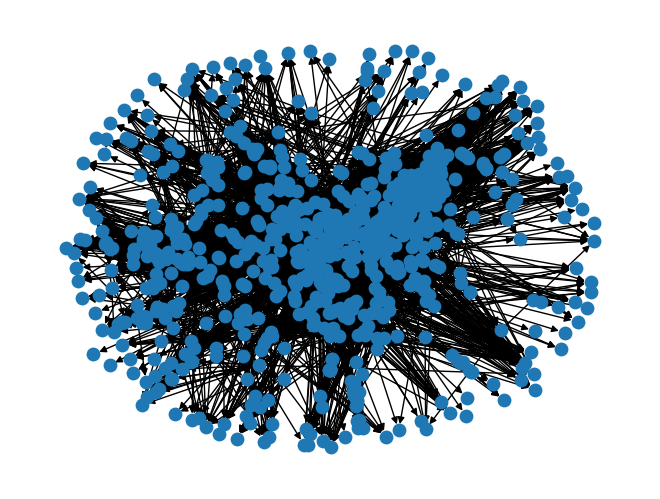

DiGraph with 744 nodes and 14127 edges: removed top 3 nodes with the highest Closeness Centrality [3397, 3434, 3403]


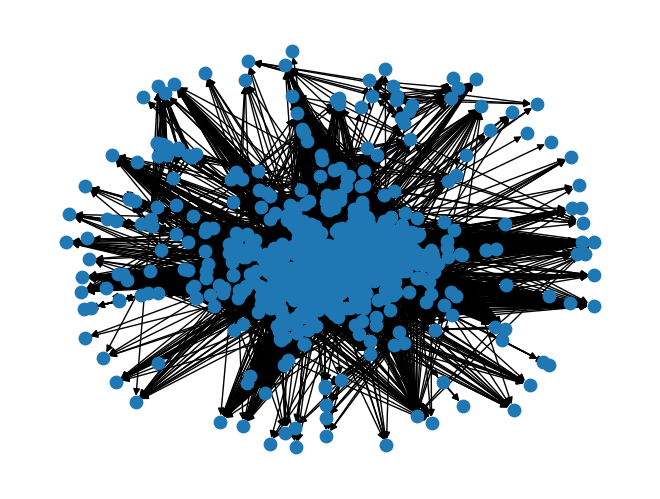

In [34]:
for graph_copy in [largest_com.copy(), second_largest_com.copy(), third_largest_com.copy()]:
    closeness_values = nx.closeness_centrality(graph_copy).items()
    top_closeness = sorted(closeness_values, key=lambda pair: pair[1], reverse=True)[:3]
    top_closeness_nodes = [node[0] for node in top_closeness]
    graph_copy.remove_nodes_from(top_closeness_nodes)
    print(f"{graph_copy}: removed top 3 nodes with the highest Closeness Centrality {top_closeness_nodes}")
    nx.draw(graph_copy, node_size=80)
    plt.show()

DiGraph with 998 nodes and 26586 edges: removed top 3 nodes with the highest Betweenness Centrality [1086, 1584, 1435]


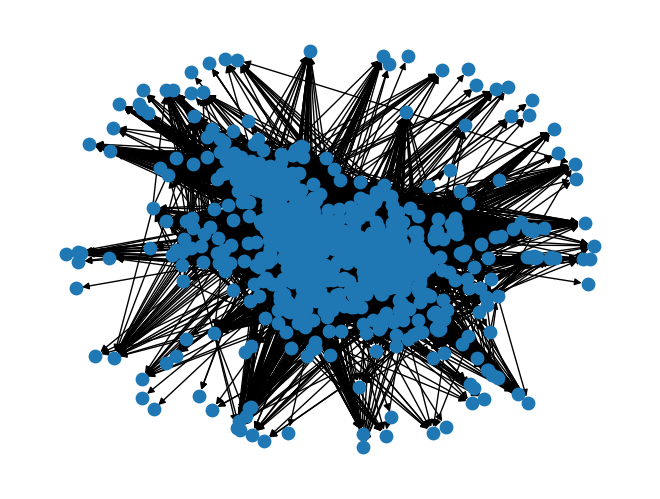

DiGraph with 750 nodes and 6625 edges: removed top 3 nodes with the highest Betweenness Centrality [3604, 3437, 698]


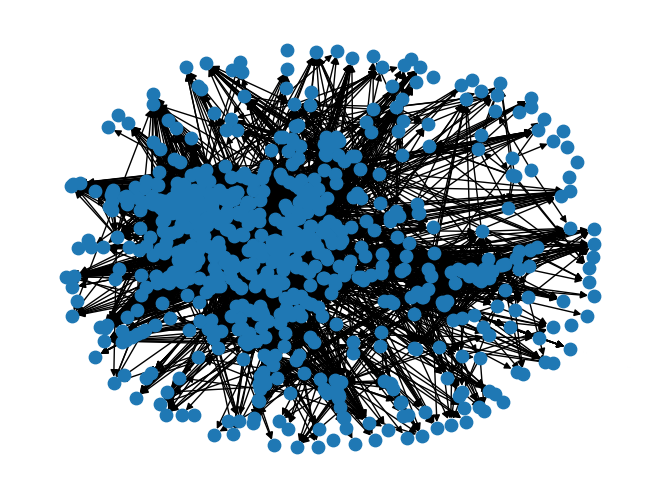

DiGraph with 744 nodes and 14179 edges: removed top 3 nodes with the highest Betweenness Centrality [2946, 3117, 3078]


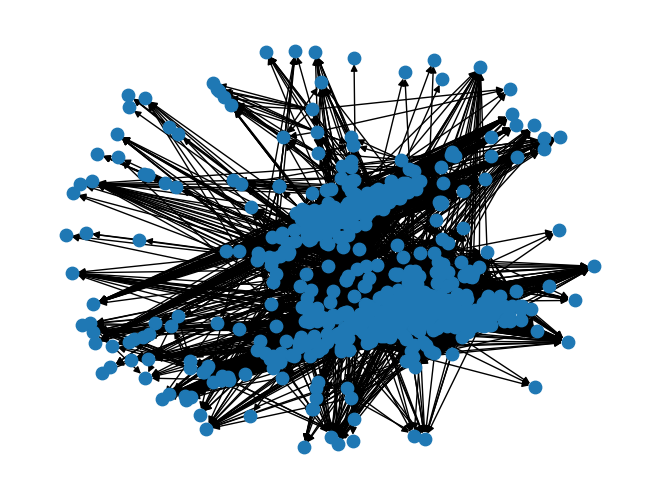

In [35]:
for graph_copy in [largest_com.copy(), second_largest_com.copy(), third_largest_com.copy()]:
    betweenness_values = nx.betweenness_centrality(graph_copy).items()
    top_betweenness = sorted(betweenness_values, key=lambda pair: pair[1], reverse=True)[:3]
    top_betweenness_nodes = [node[0] for node in top_betweenness]
    graph_copy.remove_nodes_from(top_betweenness_nodes)
    print(f"{graph_copy}: removed top 3 nodes with the highest Betweenness Centrality {top_betweenness_nodes}")
    nx.draw(graph_copy, node_size=80)
    plt.show()


DiGraph with 998 nodes and 26789 edges: removed top 3 nodes with the highest Eigenvector Centrality [1911, 1902, 1898]


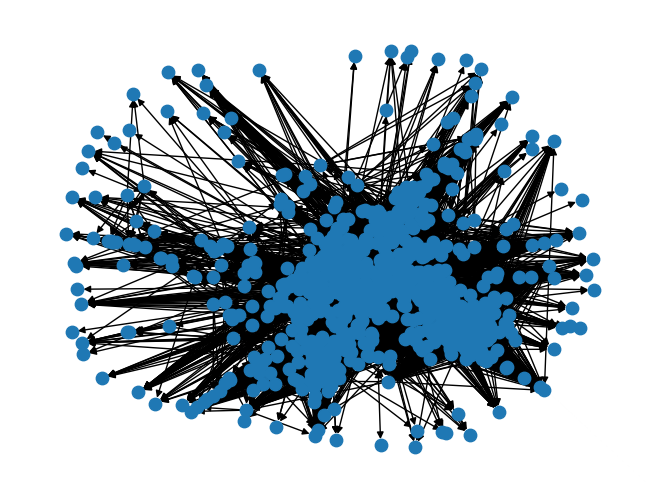

DiGraph with 750 nodes and 7183 edges: removed top 3 nodes with the highest Eigenvector Centrality [3971, 3968, 3962]


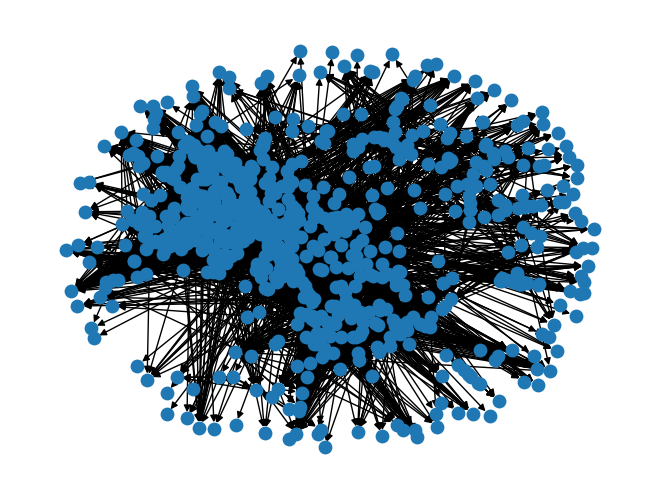

DiGraph with 744 nodes and 14189 edges: removed top 3 nodes with the highest Eigenvector Centrality [3434, 3422, 3419]


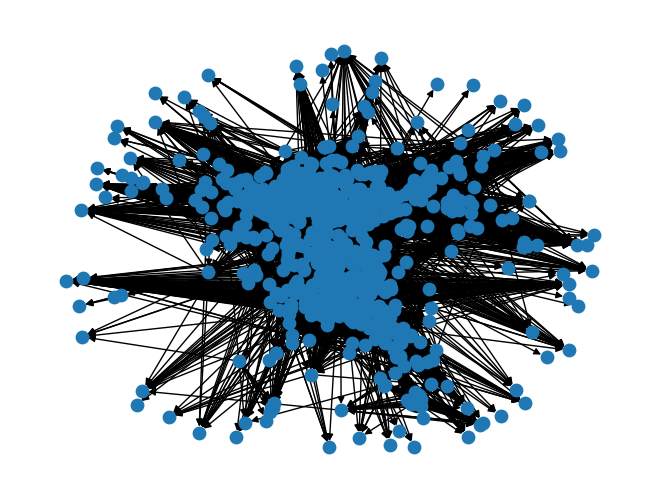

In [37]:
for graph_copy in [largest_com.copy(), second_largest_com.copy(), third_largest_com.copy()]:
    eigenvector_values = nx.eigenvector_centrality(graph_copy, max_iter=1000).items()
    top_eigenvector = sorted(eigenvector_values, key=lambda pair: pair[1], reverse=True)[:3]
    top_eigenvector_nodes = [node[0] for node in top_eigenvector]
    graph_copy.remove_nodes_from(top_eigenvector_nodes)
    print(f"{graph_copy}: removed top 3 nodes with the highest Eigenvector Centrality {top_eigenvector_nodes}")
    nx.draw(graph_copy, node_size=80)
    plt.show()

## 10. Draw the influencers of those top 3 communities.

DiGraph with 1001 nodes and 27057 edges: top node with maximum closeness centrality 1881
DiGraph with 1001 nodes and 27057 edges: top node with maximum betweenness centrality 1086


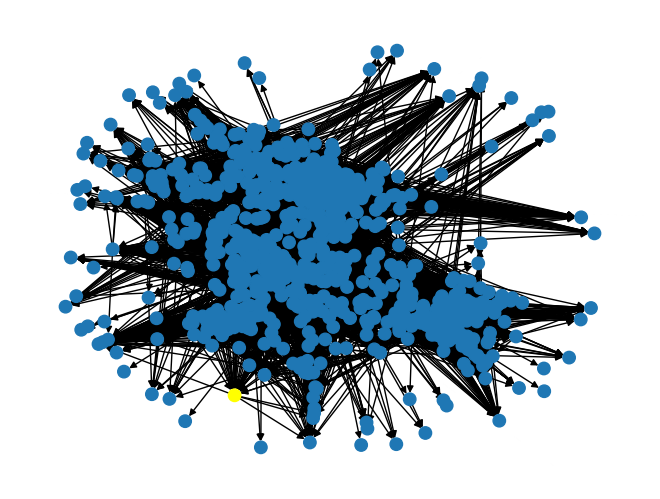

DiGraph with 753 nodes and 7312 edges: top node with maximum closeness centrality 3948
DiGraph with 753 nodes and 7312 edges: top node with maximum betweenness centrality 3604


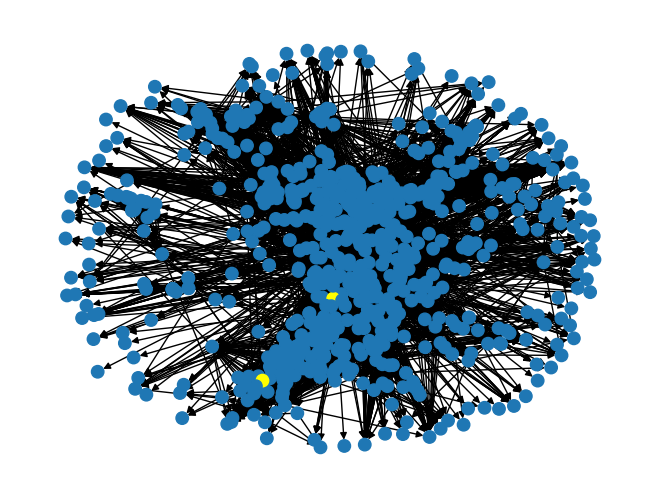

DiGraph with 747 nodes and 14397 edges: top node with maximum closeness centrality 3397
DiGraph with 747 nodes and 14397 edges: top node with maximum betweenness centrality 2946


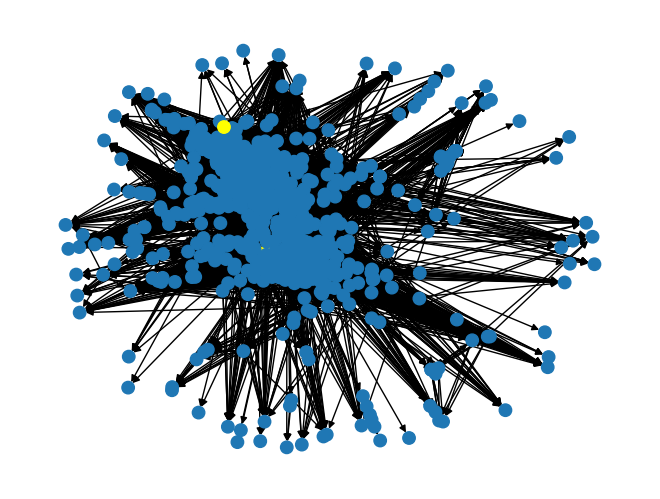

In [38]:
for graph_copy in [largest_com.copy(), second_largest_com.copy(), third_largest_com.copy()]:
    closeness_values = nx.closeness_centrality(graph_copy).items()
    top_closeness = sorted(closeness_values, key=lambda pair: pair[1], reverse=True)[0]
    top_closeness_node = top_closeness[0]
    print(f"{graph_copy}: top node with maximum closeness centrality {top_closeness_node}")

    betweenness_values = nx.betweenness_centrality(graph_copy).items()
    top_betweenness = sorted(betweenness_values, key=lambda pair: pair[1], reverse=True)[0]
    top_betweenness_node = top_betweenness[0]
    print(f"{graph_copy}: top node with maximum betweenness centrality {top_betweenness_node}")

    top_nodes = [top_closeness_node, top_betweenness_node]
    color_map = ['yellow' if node in top_nodes else 'tab:blue' for node in graph_copy.nodes]

    nx.draw(graph_copy, node_color=color_map, node_size=80)
    plt.show()


## 11. Design an action plan

a. Use hypothetical business (telecom, marketing agency, etc.) <br>
b. Use a hypothetical marketing budget<br>
c. Use a hypothetical cost per action (advertisement cost)<br>
d. Decide whom should you target?

In this hypothetical marketing scenario, our primary aim is to elevate brand awareness and drive leads, armed with a $10,000 budget. Each online interaction is budgeted at $5, showcasing our commitment to engaging potential customers effectively. Embracing the influential landscape, we recognize the goldmine potential of influencers—individuals adept at attracting and retaining followers, essentially acting as nodes connecting to others.

Considering influencers as nodes in a network, we strategically identify those with the highest centrality and betweenness. This network-centric approach enhances the effectiveness of our engagement strategy. Our cost-effective plan involves pinpointing key influencers within the largest communities using centrality metrics like betweenness. These influencers, acting as central nodes with significant network impact, become focal points of our marketing approach, with each engagement requiring a $5 investment per action.

By aligning our strategy with network dynamics, we aim to amplify our brand message through influencers strategically positioned within influential communities. This approach not only optimizes our budget but also maximizes the potential network impact, contributing to the overall success of our marketing objectives.